Here we will implement a machine learning model using python, pandas, and scikit-learn to check the transaction database and train the model to be able to classify new transactions as fraudulent or not.

# Importing libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing dataset

In [6]:
data = pd.read_csv('CreditCard_fraud.csv')

In [7]:
data.head() #checking the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis 
In this section, we’ll make a preliminary data analysis, to verify the variables in the dataset, null values, and pie chart of legal and illegal transactions.

In [52]:
data.isnull().sum() # check null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [53]:
data.shape # check the size of dataset 

(6362620, 11)

In [54]:
X = data.drop('isFraud', axis=1) # droping unnecessary colums

In [13]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [55]:
X = X.drop(['step','nameOrig','nameDest'], axis = 1) 

In [56]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,4,181.00,181.00,0.00,0.00,0.00,0
3,1,181.00,181.00,0.00,21182.00,0.00,0
4,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,4,850002.52,850002.52,0.00,0.00,0.00,0


In [57]:
X.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06
std,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


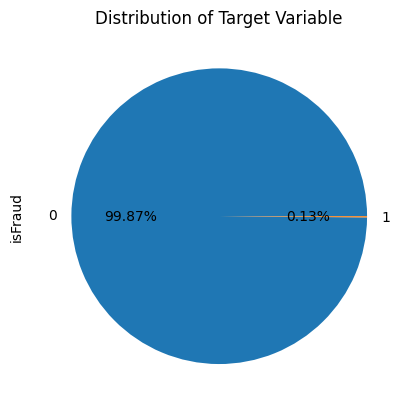

In [59]:
data['isFraud'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

Pie chart show target variable is Fraud has 99.8% of not fraud transactions aand .13% transactions are not fraud.

# Data Pre-processing

Before we create the machine learning model, we will need to make some adjustments to the dataset values. First divide the dataset into train and test and balance the values using label encoder.


In [61]:
from sklearn.preprocessing import LabelEncoder


In [62]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [63]:
data.groupby('type')['isFraud','isFlaggedFraud'].sum()

/var/folders/r2/9ds2618j6856jftkn59ymwrm0000gn/T/ipykernel_97296/369135295.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('type')['isFraud','isFlaggedFraud'].sum()


,isFraud,isFlaggedFraud
type,,
0,0,0
1,4116,0
2,0,0
3,0,0
4,4097,16


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [67]:
X = data.drop(['isFraud','isFlaggedFraud','step','nameOrig','nameDest'], axis = 1)
y = data['isFraud']

In [37]:
X.shape

(6362620, 6)

In [38]:
y.shape

(6362620,)

# Splitting dataset and applying Logistic Regression 

The train data will be used to create the machine learning model, and the test data is used to check the accuracy of the model.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.35)# to distibute data in equal proportion

After pre-processing the data, we can create the machine learning model, as we are dealing with a binary problem, we will use the logistic regression to check if the transactions can be labeled as is fraud or not fraud.

In [40]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
model.score(X_test,y_test)

0.9991108784027425

AFter applying the machine learning model, we can check the model predictions using test data.

In [69]:
y_pred = model.predict(X_test)

### Confusion Matrix

We are getting 99% accuracy and to check our model performance we’ve some metrics as given follows:

-TN — True Negative: when a case was negative and predicted negative;
-TP — True Positive: when a case was positive and predicted positive;
-FN — False Negative: when a case was positive but predicted negative;
-FP — False Positive: when a case was negative but predicted positive.


<AxesSubplot: >

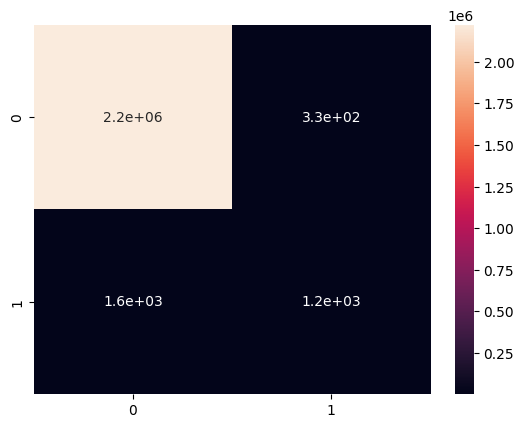

In [70]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [71]:
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [72]:
print(accuracy_score(y_test,y_pred))

0.9991108784027425


In [73]:
#printing report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2224042
           1       0.79      0.43      0.55      2875

    accuracy                           1.00   2226917
   macro avg       0.89      0.71      0.78   2226917
weighted avg       1.00      1.00      1.00   2226917



we have got good results in the model and further we can improve the model performance.